# Avocado Project
## 1. Model building for the continuous data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('Avocado_project.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### We need to separate the date into date, day and month

In [19]:
import datetime
data['Date']=pd.to_datetime(data['Date'])
data['day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


#### Let's drop unnecessary columns

In [20]:
data = data.drop(columns =['Unnamed: 0','Date'],axis = 1)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [21]:
data.isna().sum().sum()

0

#### Since there are no null values, we do not need to fill them, and data looks good.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  day           18249 non-null  int64  
 13  month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


#### Let's check whether the categorical data are balanced or not

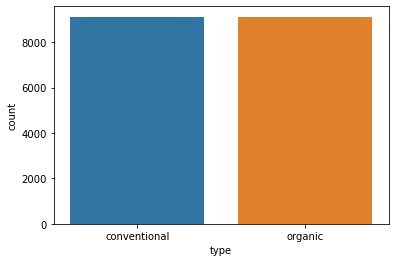

In [23]:
sns.countplot(data['type'])
plt.show()

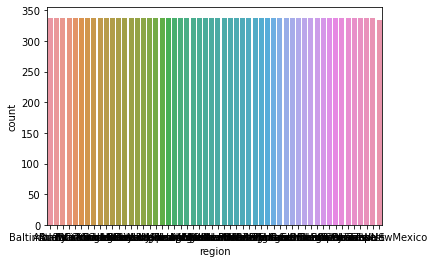

In [24]:
sns.countplot(data['region'])
plt.show()

In [25]:
data.rename(columns = {'4770':'four70','Total Bags':'TotalBags',
                       'Small Bags':'SmallBags','Large Bags':'LargeBags',
                       'XLarge Bags':'XLargeBags','4046':'four06','4225':'four225'}, inplace = True)
data

,AveragePrice,Total Volume,four06,four225,four70,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [26]:
data.shape

(18249, 14)

#### Let's now encode the object values in our dataset

In [27]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [28]:
data.head()

,AveragePrice,Total Volume,four06,four225,four70,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,29,11


#### Let's visualize the heatmap to have a rough idea on multicollinearity
- But we will keep them since it does not affect the accuracy that much

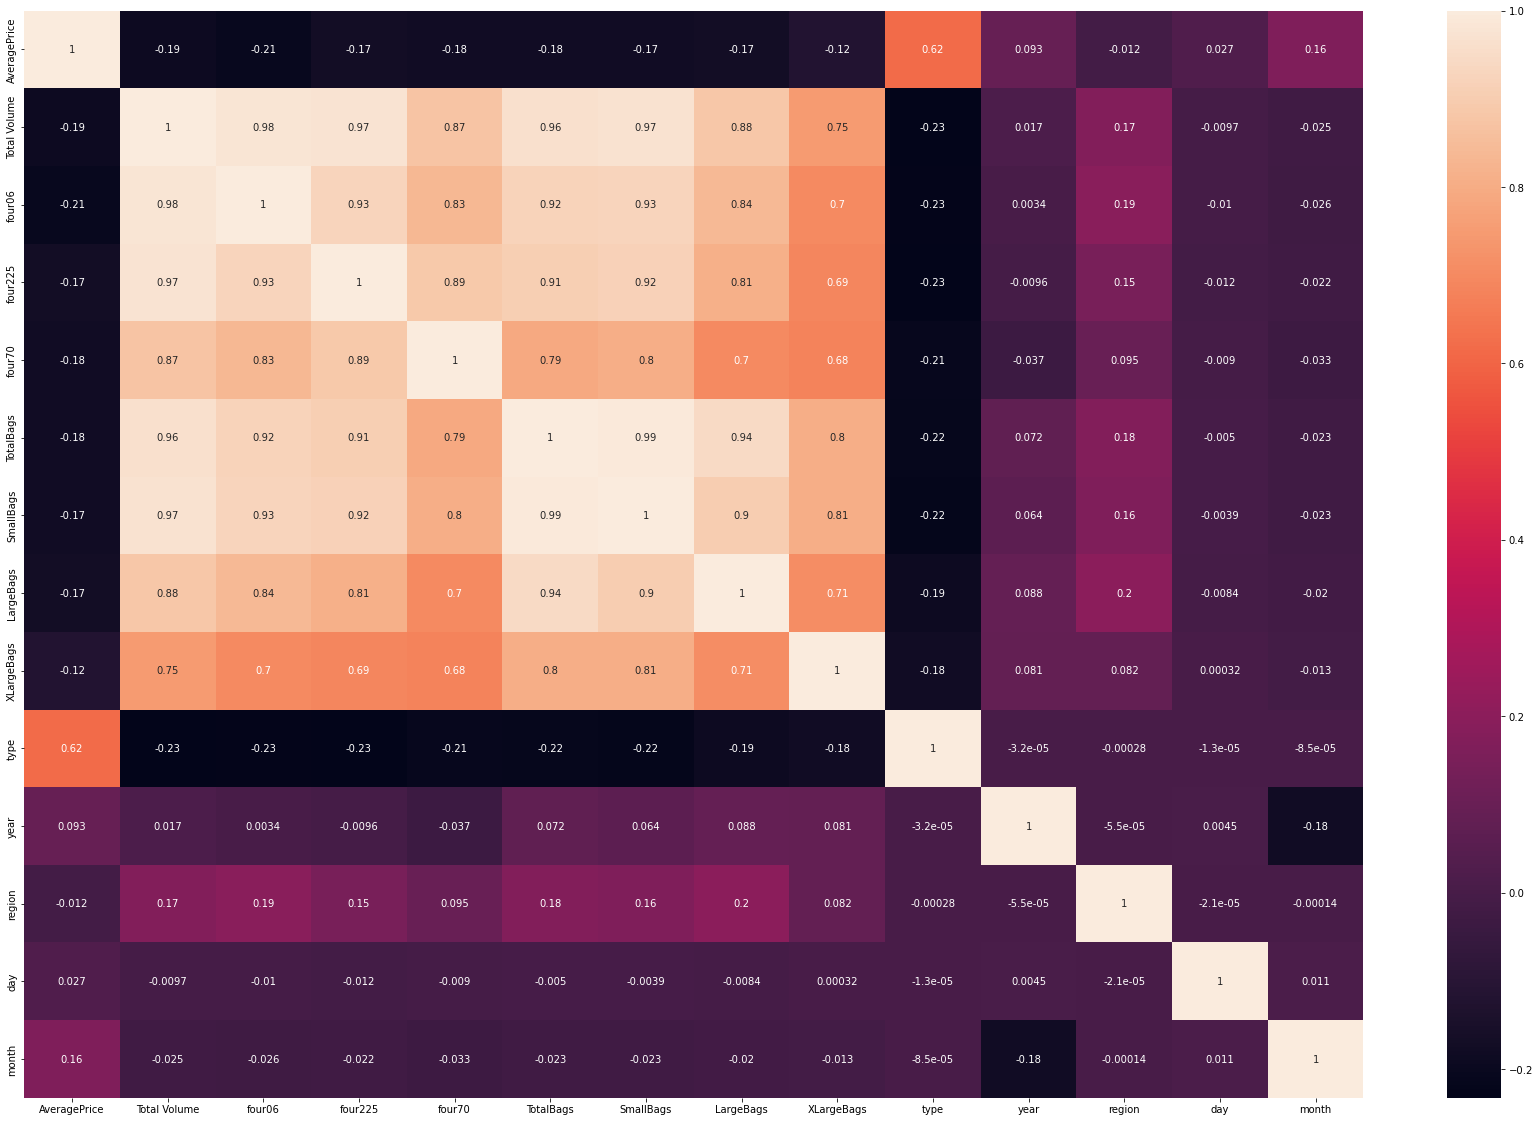

In [29]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Let's check the correlation of features with the target variable

In [30]:
corr = data.drop('AveragePrice', axis = 1).corrwith(data.AveragePrice)
corr

Total Volume   -0.192752
four06         -0.208317
four225        -0.172928
four70         -0.179446
TotalBags      -0.177088
SmallBags      -0.174730
LargeBags      -0.172940
XLargeBags     -0.117592
type            0.615845
year            0.093197
region         -0.011716
day             0.027386
month           0.162409
dtype: float64

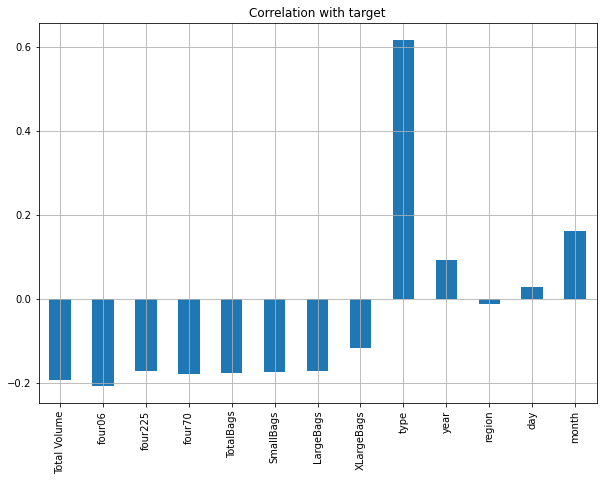

In [31]:
corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

### We can see that there is a high positive correlation between Type and the target variable
- And we will drop region and day since they have less correlation 

In [32]:
data = data.drop(columns = ['region','day'],axis = 1)

In [33]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
four06           8.648220
four225          8.942466
four70          10.159396
TotalBags        9.756072
SmallBags        9.540660
LargeBags        9.796455
XLargeBags      13.139751
type             0.000329
year             0.215339
month            0.106617
dtype: float64

### Our data looks skewed, so we better fix them, but first let's visualize it

In [36]:
data.shape

(18249, 12)

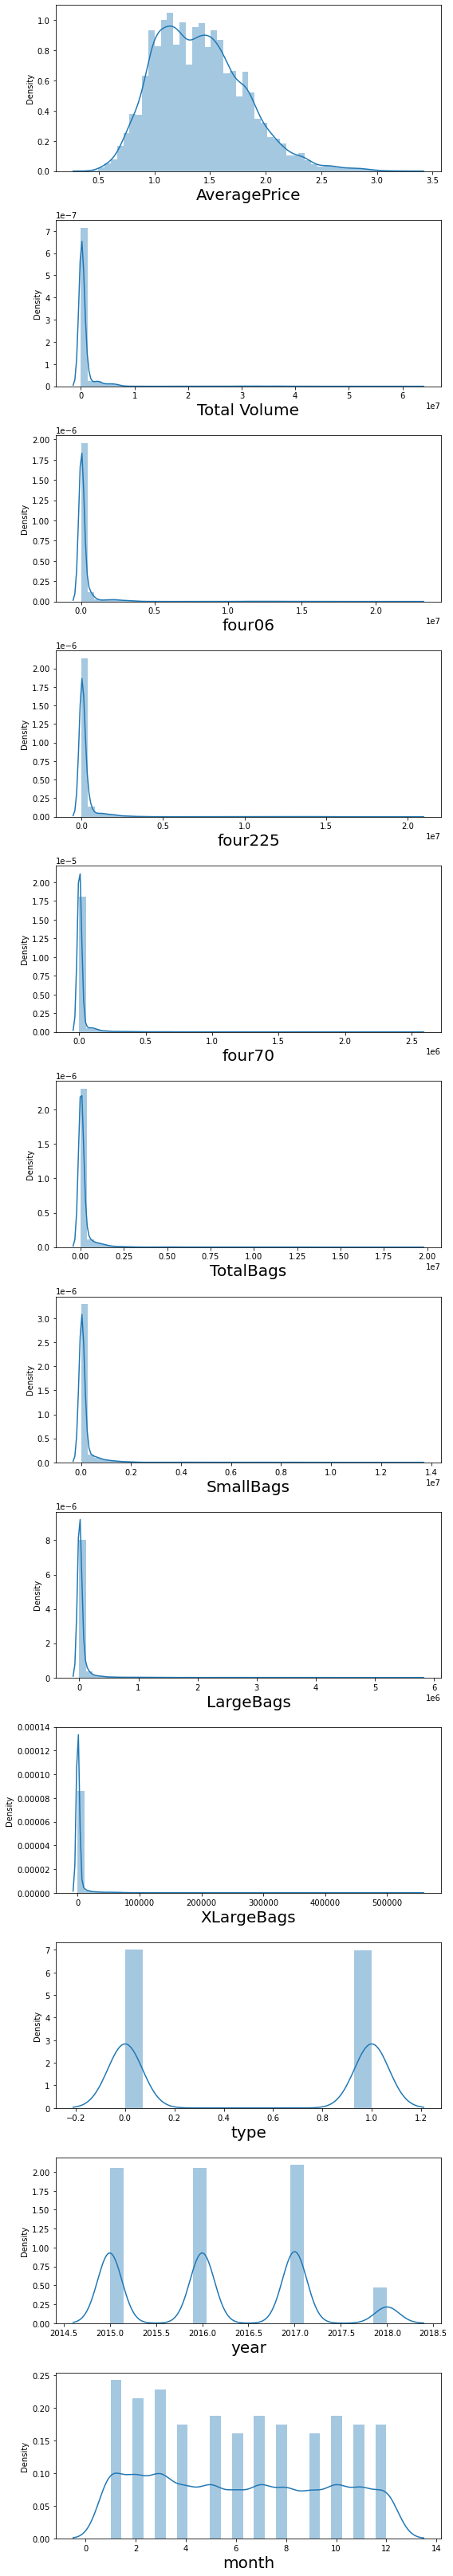

In [37]:
plt.figure(figsize = (8,45))
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax = plt.subplot(12,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.tight_layout()

### Data is skewed right, so let's remove them using Power Transformer

In [38]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
features = ['Total Volume','four06','four225','four70','TotalBags','SmallBags','LargeBags','XLargeBags']
data[features] = scaler.fit_transform(data[features].values)
data[features].head()

,Total Volume,four06,four225,four70,TotalBags,SmallBags,LargeBags,XLargeBags
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849


In [39]:
data.skew()

AveragePrice    0.580303
Total Volume    0.011171
four06         -0.022679
four225        -0.017740
four70          0.032184
TotalBags      -0.001626
SmallBags       0.007058
LargeBags      -0.073809
XLargeBags      0.793520
type            0.000329
year            0.215339
month           0.106617
dtype: float64

### Now, let's check the outliers and remove them if necessary

In [40]:
x = data.drop(columns = ['AveragePrice'],axis = 1)
x.shape

(18249, 11)

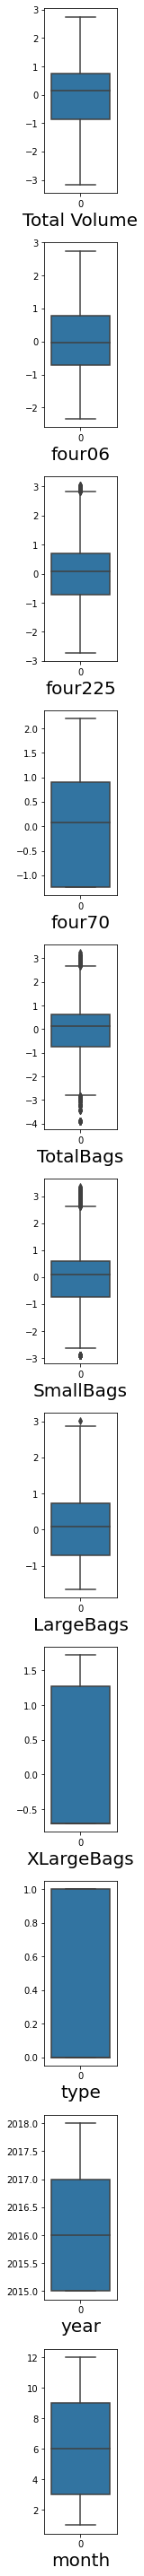

In [41]:
plt.figure(figsize = (2,40))
graph = 1

for column in x:
    if graph <=11 :
        ax = plt.subplot(11,1,graph)
        sns.boxplot(data=x[column])
        
        plt.xlabel(column,fontsize = 20)
    graph +=1
plt.tight_layout()

In [42]:
# Find the IQR to identify the outliers

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1
iqr

AveragePrice    0.560000
Total Volume    1.615046
four06          1.478434
four225         1.416074
four70          2.135860
TotalBags       1.363156
SmallBags       1.345354
LargeBags       1.432293
XLargeBags      1.973330
type            1.000000
year            2.000000
month           6.000000
dtype: float64

In [43]:
four225_high = q3.four225 + (1.5*iqr.four225)
index = np.where(data['four225']>four225_high)
data = data.drop(data.index[index])
data.reset_index().head()

four70_high = q3.four70 + (1.5*iqr.four70)
index = np.where(data['four70']>four70_high)
data = data.drop(data.index[index])
data.reset_index().head()

tb_high = q3.TotalBags + (1.5*iqr.TotalBags)
index = np.where(data['TotalBags']>tb_high)
data = data.drop(data.index[index])
data.reset_index().head()

tb_low = q3.TotalBags - (1.5*iqr.TotalBags)
index = np.where(data['TotalBags']<tb_low)
data = data.drop(data.index[index])
data.reset_index().head()

sb_high = q3.SmallBags + (1.5*iqr.SmallBags)
index = np.where(data['SmallBags']>sb_high)
data = data.drop(data.index[index])
data.reset_index().head()

sb_low = q3.SmallBags - (1.5*iqr.SmallBags)
index = np.where(data['SmallBags']<sb_low)
data = data.drop(data.index[index])
data.reset_index().head()

lb_high = q3.LargeBags + (1.5*iqr.LargeBags)
index = np.where(data['LargeBags']>lb_high)
data = data.drop(data.index[index])
data.reset_index().head()

xb_high = q3.XLargeBags + (1.5*iqr.XLargeBags)
index = np.where(data['XLargeBags']>xb_high)
data = data.drop(data.index[index])
data.reset_index().head()

xb_low = q3.XLargeBags - (1.5*iqr.XLargeBags)
index = np.where(data['XLargeBags']<xb_low)
data = data.drop(data.index[index])
data.reset_index().head()

,index,AveragePrice,Total Volume,four06,four225,four70,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,month
0,0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0.0,2015,12
1,1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0.0,2015,12
2,2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.0,2015,12
3,3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0.0,2015,12
4,4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0.0,2015,11


### Splitting features and label

In [45]:
x = data.drop(columns = ['AveragePrice'],axis = 1)
y = data['AveragePrice']

### Let's perform feature selection using PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mmscaler = MinMaxScaler()
stdscaler = StandardScaler()

In [48]:
x_scaled = stdscaler.fit_transform(x)
x_scaled1 = mmscaler.fit_transform(x)

In [49]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[-1.08424790e+00, -2.29161650e+00, -3.34207202e-01, ...,
         1.96916718e-01, -4.55775194e-02,  1.19801083e-01],
       [-1.13179178e+00, -2.27879257e+00, -3.52892056e-01, ...,
         4.67058718e-02, -5.53406629e-02,  8.63712056e-02],
       [-8.37222703e-01, -2.34483039e+00, -2.69382769e-01, ...,
         3.74247433e-01,  6.82869629e-02,  2.85137876e-01],
       ...,
       [-2.13328985e+00,  2.16002025e+00,  4.80057241e-01, ...,
        -1.70243568e-02, -1.74304694e-02, -5.64510037e-02],
       [-1.99124742e+00,  2.16921725e+00,  4.75953062e-01, ...,
        -2.31873312e-03, -9.44600354e-03, -5.50710234e-02],
       [-2.04058765e+00,  2.18917701e+00,  4.58448232e-01, ...,
         4.48978482e-02,  9.55260452e-03, -7.34041885e-02]])

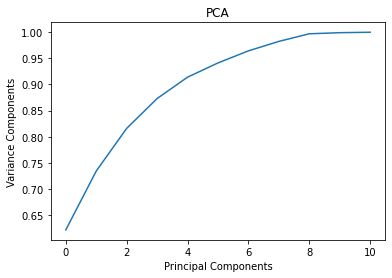

In [50]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Components')
plt.title('PCA')
plt.show()

In [51]:
pca = PCA(n_components = 8)
new_pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(new_pcomp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.084248,-2.291616,-0.334207,-0.316876,0.321746,0.946104,-0.153303,0.845985
1,-1.131792,-2.278793,-0.352892,-0.338171,0.298934,0.969344,-0.081367,0.843480
2,-0.837223,-2.344830,-0.269383,-0.299081,0.352836,1.100088,0.110716,0.852651
3,-1.084548,-2.330688,-0.290604,-0.308331,0.182726,1.087347,-0.111819,0.779474
4,-1.196981,-2.133926,-0.107254,-0.310985,0.037055,1.066376,-0.152148,0.718958
...,...,...,...,...,...,...,...,...
16188,-2.382630,2.352465,-0.113618,0.177283,0.498713,-0.180910,-0.320170,-0.023120
16189,-2.533996,2.465876,0.162480,0.071413,0.419382,-0.046450,-0.140117,0.107917
16190,-2.133290,2.160020,0.480057,-0.456460,0.689424,0.528681,0.598522,-1.090892
16191,-1.991247,2.169217,0.475953,-0.393993,0.735494,0.485397,0.589744,-1.072836


### Now, it is time to build our model
- first let's import the necessary libraries

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,r2_score, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

### Initializing different algorithms

In [54]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LinearRegression()
xgb = xgb.XGBRegressor()
svc = SVC()
svr = SVR()

### Creating a function for train_test_split to be used for different algorithms
- turns out that xgboost works best 

In [57]:
for i in range(0,30):
    x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size = 0.25,random_state = i)
    xgb.fit(x_train,y_train)
    y_train_pred = xgb.predict(x_train)
    y_test_pred = xgb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {r2_score(y_test,y_test_pred)}",'\n')

At random state 0, the training accuracy is : 0.9231695865779332
At random state 0, the testing accuracy is : 0.7980934307861104 

At random state 1, the training accuracy is : 0.9252683535290042
At random state 1, the testing accuracy is : 0.8047875768255809 

At random state 2, the training accuracy is : 0.9239734125324084
At random state 2, the testing accuracy is : 0.8000251129307221 

At random state 3, the training accuracy is : 0.9206498160465725
At random state 3, the testing accuracy is : 0.8059238875833372 

At random state 4, the training accuracy is : 0.9200138992969664
At random state 4, the testing accuracy is : 0.7995166576788838 

At random state 5, the training accuracy is : 0.9207959266336436
At random state 5, the testing accuracy is : 0.8076094563824082 

At random state 6, the training accuracy is : 0.9214309407873811
At random state 6, the testing accuracy is : 0.8057900747722826 

At random state 7, the training accuracy is : 0.9248028012782936
At random state 7,

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 29)

xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
y_pred = xgb.predict(x_test)
print(f"The r2 score of test data is = {r2_score(y_test,y_pred)*100:.2f}%")

The r2 score of test data is = 85.57%


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_pred = xgb.predict(x_train)

print("\n---- Model Evaluation for TRAIN DATA ----\n")

print("MAE is : ",mean_absolute_error(y_train,y_train_pred))

print('MSE is :',mean_squared_error(y_train,y_train_pred))

print('RMSE is :',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred = xgb.predict(x_test)

print("\n\n---- Model Evaluation for TEST DATA ----\n")

print("MAE is : ",mean_absolute_error(y_test,y_test_pred))

print('MSE is :',mean_squared_error(y_test,y_test_pred))

print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_test_pred)))


---- Model Evaluation for TRAIN DATA ----

MAE is :  0.0658241925057765
MSE is : 0.008219747991235987
RMSE is : 0.09066282585070899


---- Model Evaluation for TEST DATA ----

MAE is :  0.10614094258856262
MSE is : 0.02208882729662363
RMSE is : 0.14862310485460742


**RMSE value do not differ much, so our model looks good in terms of overfitting.**
## Checking model overfitting
### L1 form

In [62]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lasscv = LassoCV(alphas = None, max_iter = 2, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2, normalize=True)

In [63]:
alpha = lasscv.alpha_
alpha

2.1505632729415207e-06

In [64]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.1505632729415207e-06)

In [65]:
lasso_reg.score(x_test,y_test)

0.5515684013845795

## L2 form

In [66]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True) #arange = giving range for learning rate
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [67]:
ridgecv.alpha_

0.001

In [68]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [69]:
ridge_model.score(x_test,y_test)

0.5515697731604423

#### L1 and L2 do not differ much, so our model does not overfit

## 2. Model building for the categorical data

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('Avocado_project.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [72]:
import datetime
data['Date']=pd.to_datetime(data['Date'])
data['day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [73]:
data = data.drop(columns =['Unnamed: 0','Date'],axis = 1)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [74]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [75]:
corr = data.drop('region', axis = 1).corrwith(data.region)
corr

AveragePrice   -0.011716
Total Volume    0.174176
4046            0.192073
4225            0.145726
4770            0.095252
Total Bags      0.175256
Small Bags      0.164702
Large Bags      0.198768
XLarge Bags     0.082281
type           -0.000280
year           -0.000055
day            -0.000021
month          -0.000144
dtype: float64

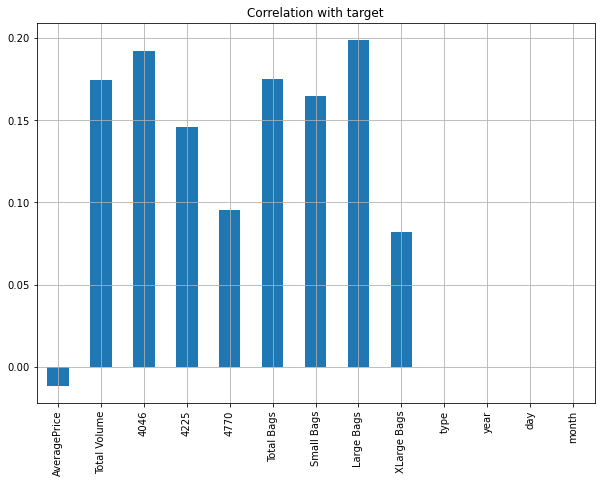

In [76]:
corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

In [77]:
data = data.drop(columns = ['type','year','day','month'])

In [78]:
x = data.drop('region',axis = 1)
y = data.region

In [79]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
region           0.000030
dtype: float64

In [80]:
data.shape

(18249, 10)

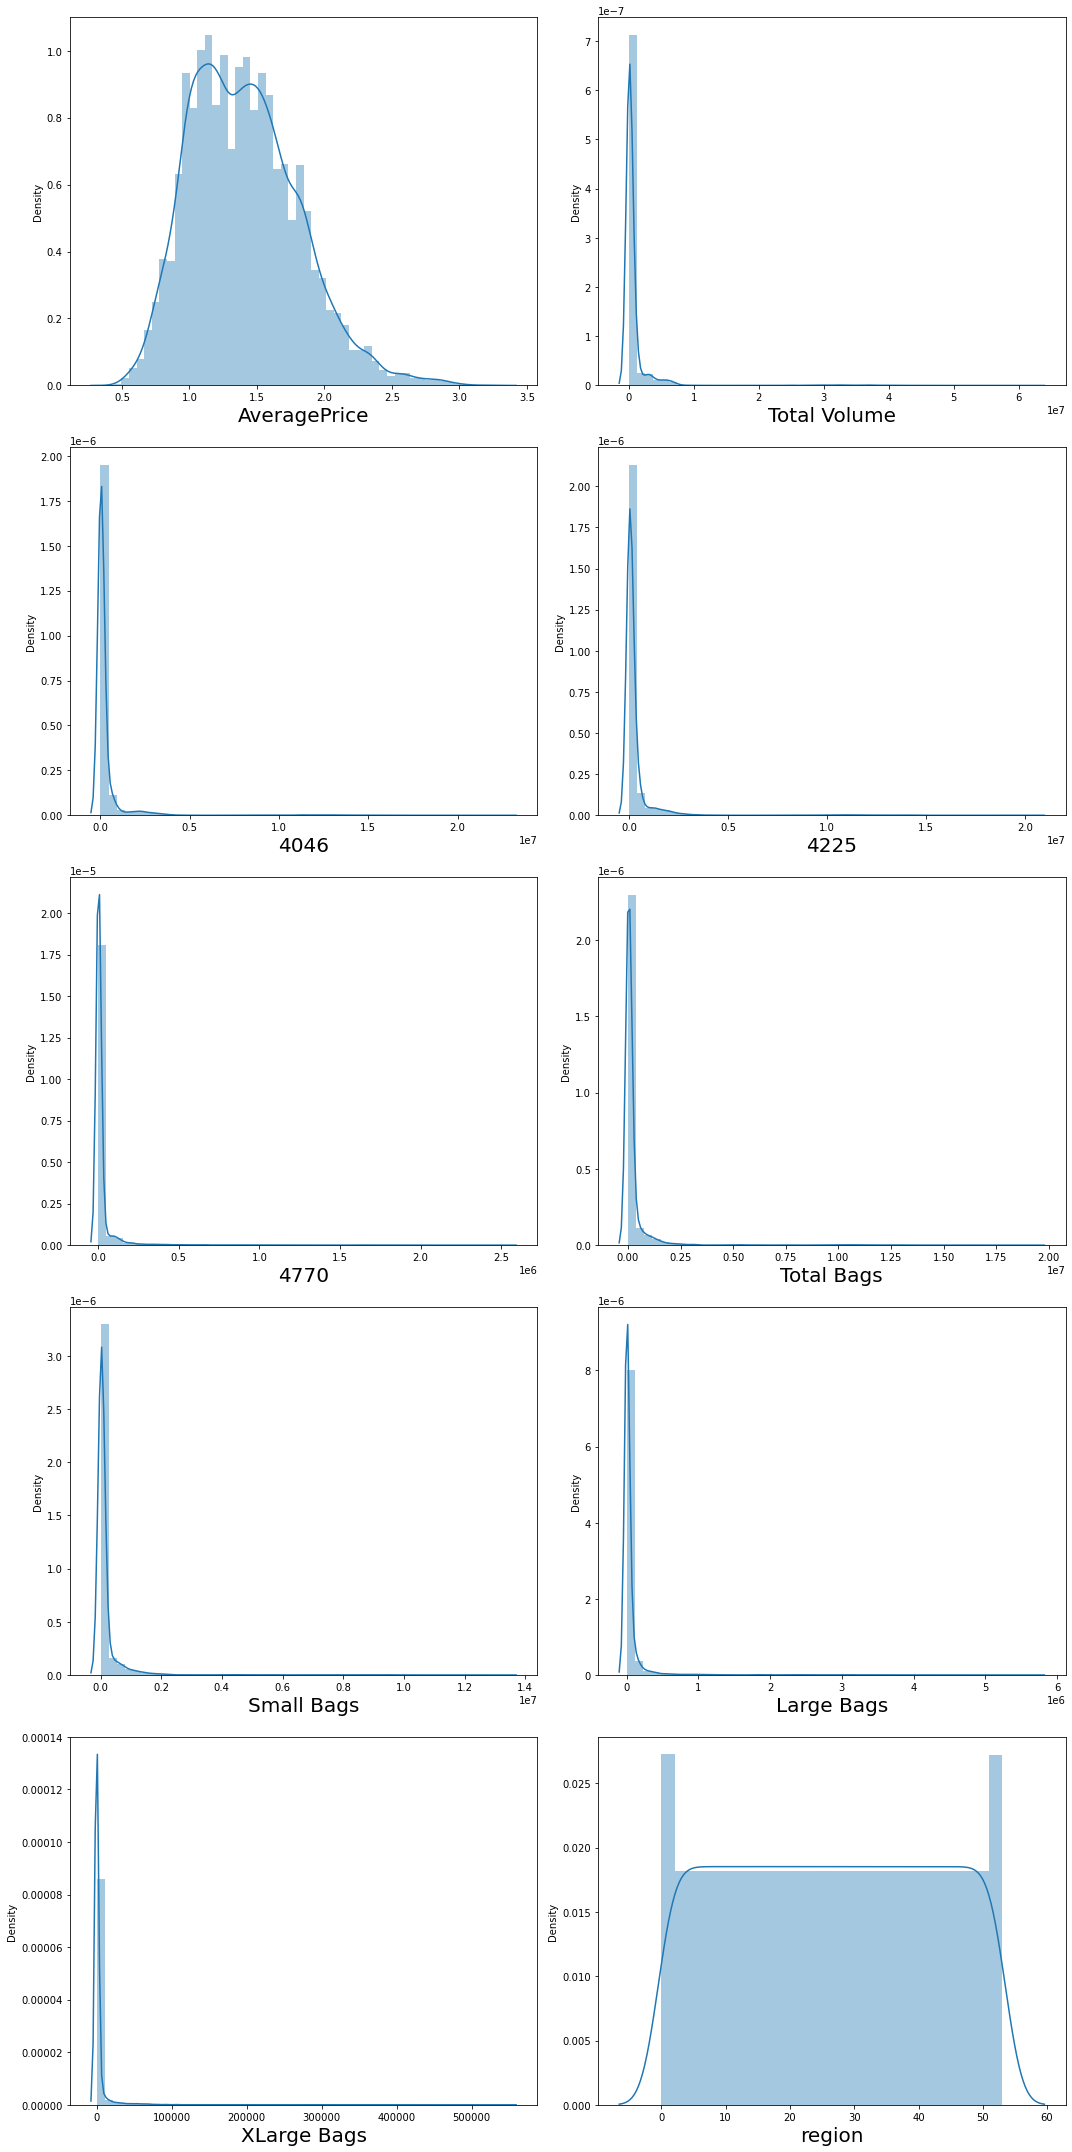

In [81]:
plt.figure(figsize = (15,30))
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [82]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method = 'yeo-johnson')
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
data[features] = scaler.fit_transform(data[features].values)
data[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849


In [83]:
data.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
region          0.000030
dtype: float64

In [84]:
x = data.drop(columns = ['region'],axis = 1)
y = data['region']

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mmscaler = MinMaxScaler()
stdscaler = StandardScaler()

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,r2_score, accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

In [87]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LinearRegression()
xgb = xgb.XGBRegressor()
svc = SVC()
svr = SVR()

In [89]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    rf.fit(x_train,y_train)
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}",'\n')

At random state 0, the training accuracy is : 1.0
At random state 0, the testing accuracy is : 0.8893271970195047 

At random state 1, the training accuracy is : 1.0
At random state 1, the testing accuracy is : 0.89086127547666 

At random state 2, the training accuracy is : 1.0
At random state 2, the testing accuracy is : 0.8906421214113521 

At random state 3, the training accuracy is : 1.0
At random state 3, the testing accuracy is : 0.8827525750602674 

At random state 4, the training accuracy is : 1.0
At random state 4, the testing accuracy is : 0.8875739644970414 

At random state 5, the training accuracy is : 1.0
At random state 5, the testing accuracy is : 0.8928336620644313 

At random state 6, the training accuracy is : 1.0
At random state 6, the testing accuracy is : 0.8902038132807364 

At random state 7, the training accuracy is : 1.0
At random state 7, the testing accuracy is : 0.8847249616480386 

At random state 8, the training accuracy is : 1.0
At random state 8, the t

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 19)

In [91]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
y_pred = rf.predict(x_test)
print(f"The r2 score of test data is = {accuracy_score(y_test,y_pred)*100:.2f}%")

The r2 score of test data is = 89.26%


In [97]:
cfm = confusion_matrix(y_test,y_pred)
print(cfm,'\n')

[[71  0  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 88  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  1  1 ...  0  0 68]] 



## Saving the model

In [103]:
import pickle
import joblib

joblib.dump(rf,'Avocado.pkl')

['Avocado.pkl']